# HW 7 problems

## Question 1: Thermal radiation

### Learning objectives
In this question you will:

- understand and visualise the shape of the blackbody spectrum
- appreciate the importance of thermal radiation to everyday life


### 1a. 

Recall that thermal radiation at a temperature $T$ follows the Planck disitribution, $$p(\nu;T)\propto\frac{\nu^3}{e^{\beta h\nu}-1}.$$ Compute  ${h\nu_{\rm peak}\over k_BT},$ where $\nu_{\rm peak}$ is the peak frequency, to at least 5 significant figures. 

Transform $p(\nu)$ to $p(\lambda)$ and compute ${k_BT\lambda_{\rm peak}\over hc}$. Is $\lambda_{\rm peak} = \frac{c}{\nu_{\rm peak}}$? Why or why not? 

(Hint: use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). See the relevant tutorial: [GitHub](https://github.com/berkeley-physics/Python-Tutorials/blob/master/3%20-%20Specific%20topics/Solving%20equations.ipynb), [DataHub](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fberkeley-physics%2FPython-Tutorials&urlpath=tree%2FPython-Tutorials%2F3+-+Specific+topics%2FSolving+equations.ipynb&branch=master). You might also find the [`scipy.constants` module](https://docs.scipy.org/doc/scipy/reference/constants.html) helpful.)

In [ ]:
#Write your answer here

### 1b. 

<ipython-input-5-beb7fd8d4c0c>:10: RuntimeWarning: overflow encountered in exp
  p_nu = x**3/(np.exp(x)-1)


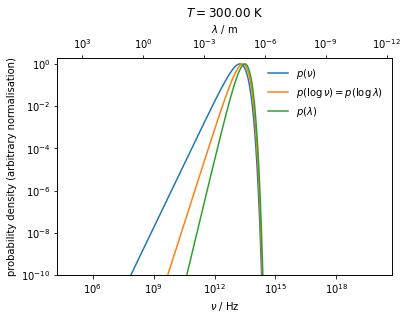

In [5]:
import numpy as np
from scipy import constants
%matplotlib inline
from matplotlib import pyplot as plt

def plot_bb(log_temp=np.log10(300)):
    T = 10**log_temp
    nu = np.logspace(5,20,1000)
    x = constants.h*nu/(constants.k*T)
    p_nu = x**3/(np.exp(x)-1) 
    
    ps = [p_nu, p_nu*nu, p_nu*nu**2]
    for i in range(3): #normalise each distirbution to 1
        ps[i] /= np.amax(ps[i])
        
    plt.loglog(nu, ps[0], label=r"$p(\nu)$")
    plt.loglog(nu, ps[1], label=r"$p(\log\,\nu)=p(\log\,\lambda)$")
    plt.loglog(nu, ps[2], label=r"$p(\lambda)$")
    
    plt.ylim(1e-10,2)
    plt.legend(frameon=False)
    plt.xlabel(r"$\nu$ / Hz")
    plt.ylabel(r"probability density (arbitrary normalisation)")
    ax = plt.gca()
    ax.set_xticks(10**np.arange(6,20,3)) #set ticks at intervals of 1000
    ax2 = ax.twiny() #add wavelength axis on top
    x_bounds = constants.c/np.array(ax.get_xlim())
    ax2.set_xlim(x_bounds)
    ax2.set_xscale("log")
    ax2.set_xlabel(r"$\lambda$ / m")
    tickpows = np.log10(x_bounds)/3
    ax2.set_xticks(10**(3*np.arange(*np.ceil(tickpows)[::-1])))
    Tpow = int(np.floor(np.log10(T)))
    if Tpow > 2:
        plt.title(r"$T = %.2f\times 10^{%d}$ K"%(T/10**Tpow,Tpow))
    else:
        plt.title(r"$T = %.2f$ K"%T)
    
plot_bb()

In [6]:
from ipywidgets import interact,interact_manual

interact(plot_bb,log_temp=(-3,8,0.1))

interactive(children=(FloatSlider(value=2.4771212547196626, description='log_temp', max=8.0, min=-3.0), Output…

<function __main__.plot_bb(log_temp=2.4771212547196626)>

The above cell contains an interactive plot of the blackbody spectrum as a function of temperature. Feel free to play around with it. Compare the axes to a chart of the EM spectrum, which can be easily found online.

At what frequency range do everyday objects radiate the most? At what temperature do objects radiate visible light the most? Assuming our eyes have evolved to match the spectrum of the sun (ignoring the scattering properties of the atmosphere and environment), roughly (order-of-magnitude) estimate the temperature of the sun.

Write your answer here

### 1c. 

In practice, the radiation from objects aren't visible to us unless they are extremely hot because they don't emit enough visible light for us to see them, i.e. they aren't bright enough. The apparent colour of an object, however, does not depend on the total brightness, but the relative intensities of red, green, and blue light. 

Let's model the eye cone cells and predict the apparent colour of objects as a function of temperature. A simple model is to assume the cones have flat frequency responses in certain ranges, i.e. the energy of all incident photons in the range are converted (to electric energy) with certainty (and 100% efficiency). Assume that red cones respond to 525-625 nm, green cones to 485-585 nm, and blue cones to 410-480 nm, and that the cones correspond exactly to RGB values used for display. (Feel free to improve this simple model.) 

Plot the apparent colour as a function of temperature, ignoring total brightness. Is a blue star hotter or colder than a red star?

(Hint: use the [`scipy.integrate` module](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) for numerical integration, see the tutorial: [GitHub](https://github.com/berkeley-physics/Python-Tutorials/blob/master/3%20-%20Specific%20topics/Numerical%20integration.ipynb), [DataHub](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fberkeley-physics%2FPython-Tutorials&urlpath=tree%2FPython-Tutorials%2F3+-+Specific+topics%2FNumerical+integration.ipynb&branch=master)).

The following cells gives an example of how to make a 1-d colour plot, with example $R,G,B$ arrays normalised to $[0,1]$.

Text(0.5, 0, '$x$')

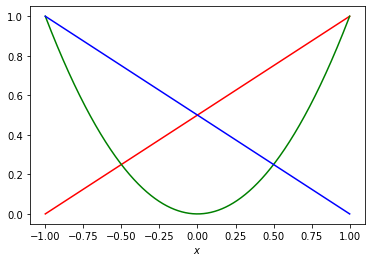

In [9]:
x = np.linspace(-1,1,1000)

#fake 1d rgb data
r = (1+x)/2
g = x**2
b = (1-x)/2

plt.plot(x,r,c="r")
plt.plot(x,g,c="g")
plt.plot(x,b,c="b")
plt.xlabel("$x$")

Text(0.5, 0, '$x$')

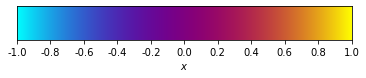

In [10]:
rgb = np.array([r,g,b]) #create 1d RGB array with shape (3,N)
rgb = rgb.T #make it (N,3), i.e. 1d array of length-N pixels (RGB arrays)
rgb = rgb.reshape((1,-1,3)) #(1,N,3) array, i.e. 2d array of pixels with one pixel in vertical direction

xticks = np.linspace(-1,1,11)
plt.imshow(rgb,aspect=100)
ax = plt.gca()
ax.set_yticks([]) #removes y-axis ticks (and labels)
ax.set_xticks((xticks+1)/2*len(x)) #sets x-axis ticks, in units of array index, from 0 to N
ax.set_xticklabels(["%.1f"%v for v in xticks]) #sets labels for ticks
ax.set_xlabel("$x$")

In [ ]:
#Write your answer here